

# Project: Investigate a Dataset - [Medical appointment no shows]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

> - ‘ScheduledDay’ tells us on what day the patient set up their appointment.
> - ‘Neighborhood’ indicates the location of the hospital.
> - ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

### Question(s) for Analysis
> - What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [3]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling



### General Properties


In [4]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
df.shape

(110527, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> - the mean age is 37 years.
> - maximum age is 115 years.
> - there is a mistake with minimun age as it shows -1 year which doesn't make sense.

In [8]:
# check for duplicate rows
df.duplicated().sum()

0

In [9]:
# Check for duplicate AppointmentID
df['AppointmentID'].duplicated().sum()

0


### Data Cleaning

 

In [10]:
# we probably won't need AppointmentID and PatientId in our analysis,so we can drop them
df.drop(['PatientId','AppointmentID'],axis=1,inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [11]:
# renaming the "No-show" column
df.rename(columns={'No-show': 'No_show'},inplace= True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [12]:
# correct 'Hipertension' to 'Hypertension' and 'Handcap' to 'Handicap'
df.rename(columns={'Hipertension': 'Hypertension','Handcap':'Handicap'},inplace= True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis


### walkthrough data properties

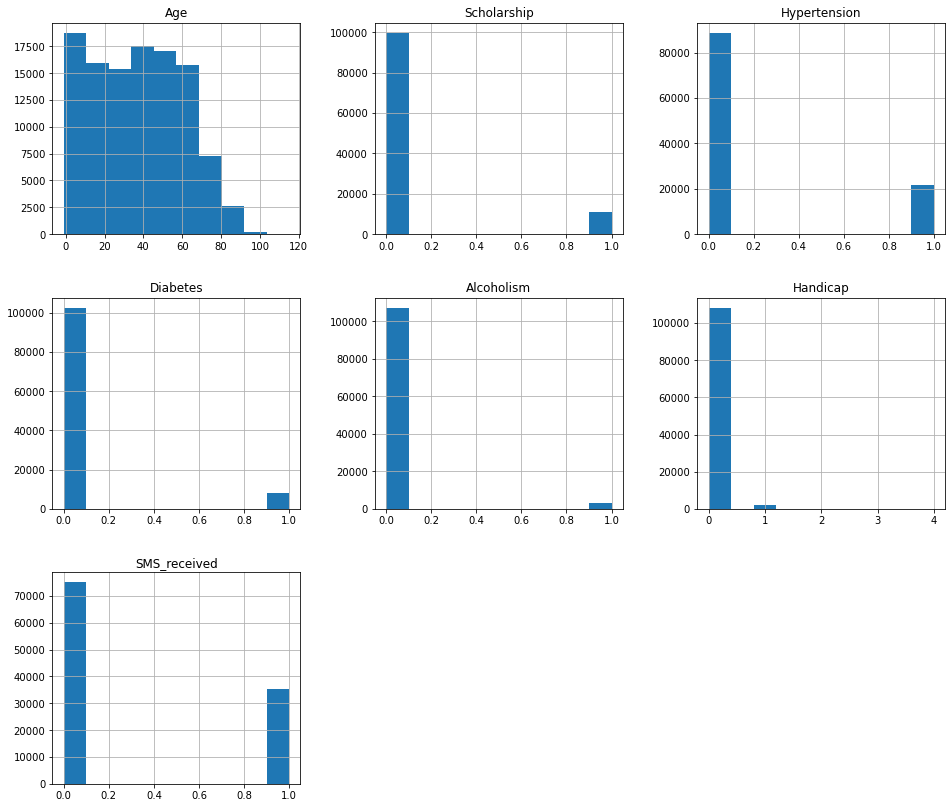

In [13]:
# histogram of the dataset variables

df.hist(figsize=(16,14));


> - most patients are not handicap
> - most patients don't have diabetes
> - about half of patients received a SMS
> - about 18%(20000 out of 110527) suffer from hypertension
> - about 9% (10000 out of 110527) patients have scholarships

In [33]:
# assign names to show and noshow to make it more easy to use
df_show=df[df['No_show']=='No']
df_noshow=df[df['No_show']=='Yes']

In [34]:
df_show.count()

Gender            88208
ScheduledDay      88208
AppointmentDay    88208
Age               88208
Neighbourhood     88208
Scholarship       88208
Hypertension      88208
Diabetes          88208
Alcoholism        88208
Handicap          88208
SMS_received      88208
No_show           88208
dtype: int64

In [128]:
df_noshow.count()

Gender            22319
ScheduledDay      22319
AppointmentDay    22319
Age               22319
Neighbourhood     22319
Scholarship       22319
Hypertension      22319
Diabetes          22319
Alcoholism        22319
Handicap          22319
SMS_received      22319
No_show           22319
dtype: int64

the number of patient who showed was about 4 times those who didn't show

### Analyze characteristics

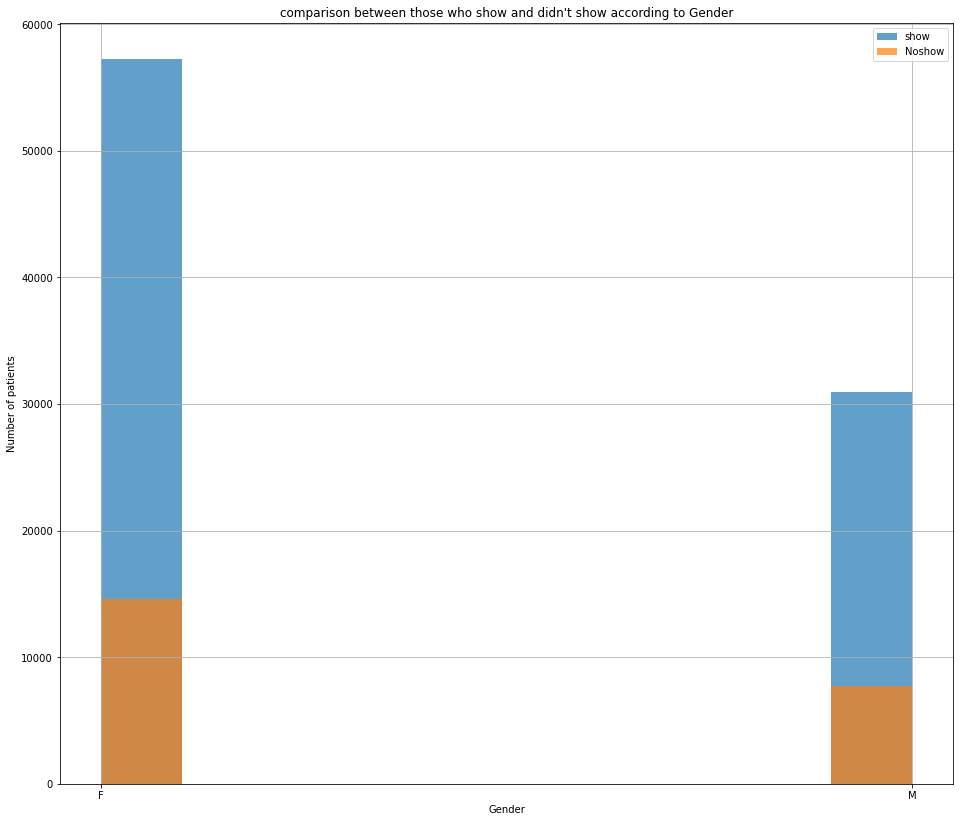

In [50]:
# compare between those who show and didn't show according to Gender

plt.figure(figsize=[16,14])
df_show['Gender'].hist(alpha=.7, label= 'show')
df_noshow['Gender'].hist(alpha=.7, label= 'Noshow')
plt.title("comparison between those who show and didn't show according to Gender")
plt.xlabel('Gender')
plt.ylabel('Number of patients')
plt.legend();

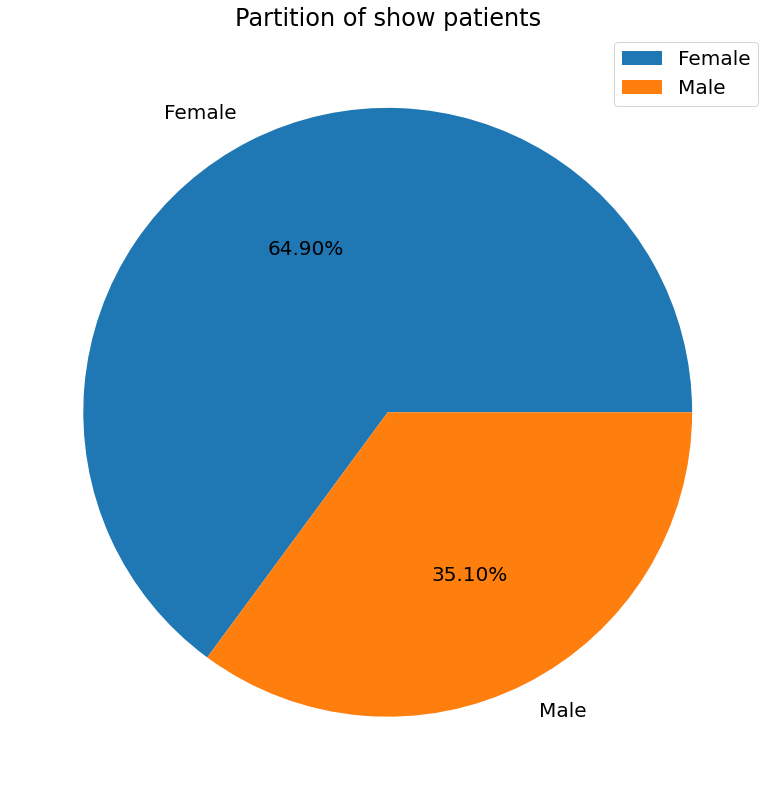

In [144]:
plt.figure(figsize=[16,14])
plt.pie(df_show['Gender'].value_counts(),labels=['Female','Male'],autopct='%1.2f%%')
plt.rc('font', size=20)
plt.title('Partition of show patients')
plt.legend();

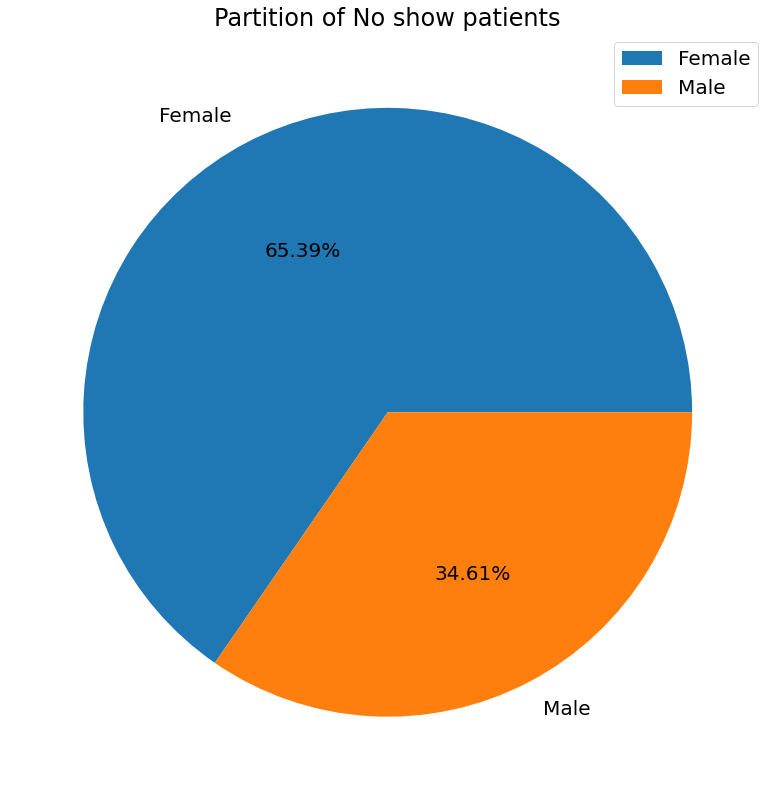

In [145]:
plt.figure(figsize=[16,14])
plt.pie(df_noshow['Gender'].value_counts(),labels=['Female','Male'],autopct='%1.2f%%')
plt.rc('font', size=20)
plt.title('Partition of No show patients')
plt.legend();

impact of Gender state is insignificant

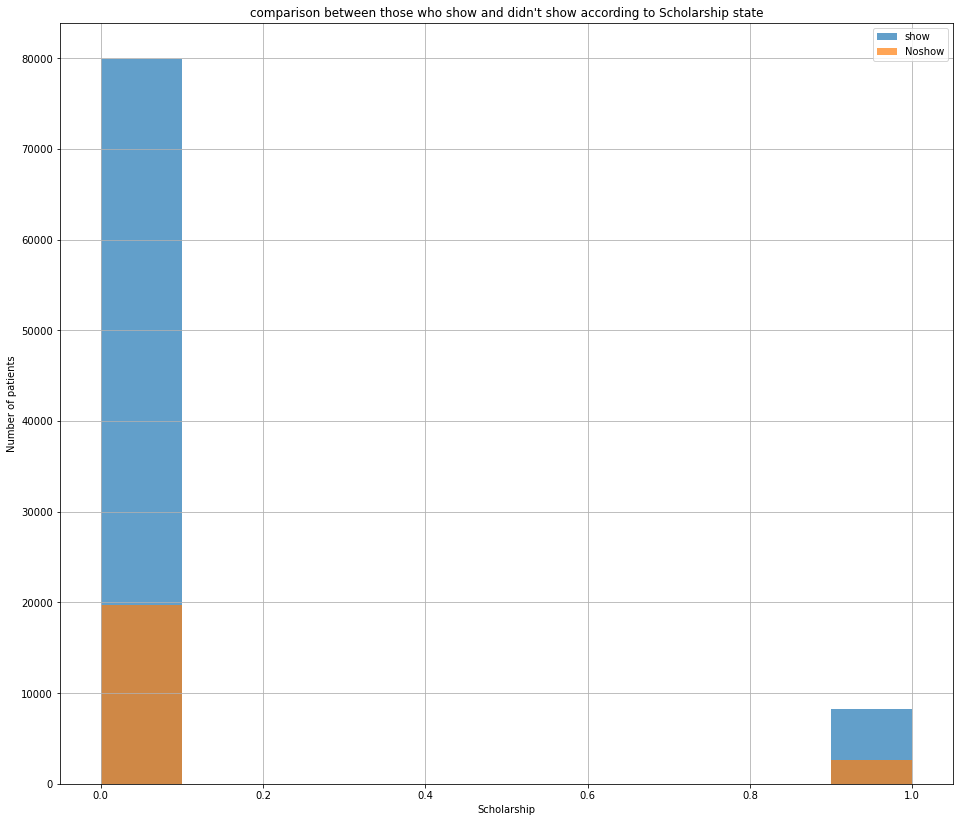

In [54]:
# compare between those who show and didn't show according to scholarship state.

plt.figure(figsize=[16,14])
df_show['Scholarship'].hist(alpha=.7, label= 'show')
df_noshow['Scholarship'].hist(alpha=.7, label= 'Noshow')
plt.title("comparison between those who show and didn't show according to Scholarship state")
plt.xlabel('Scholarship')
plt.ylabel('Number of patients')
plt.legend();

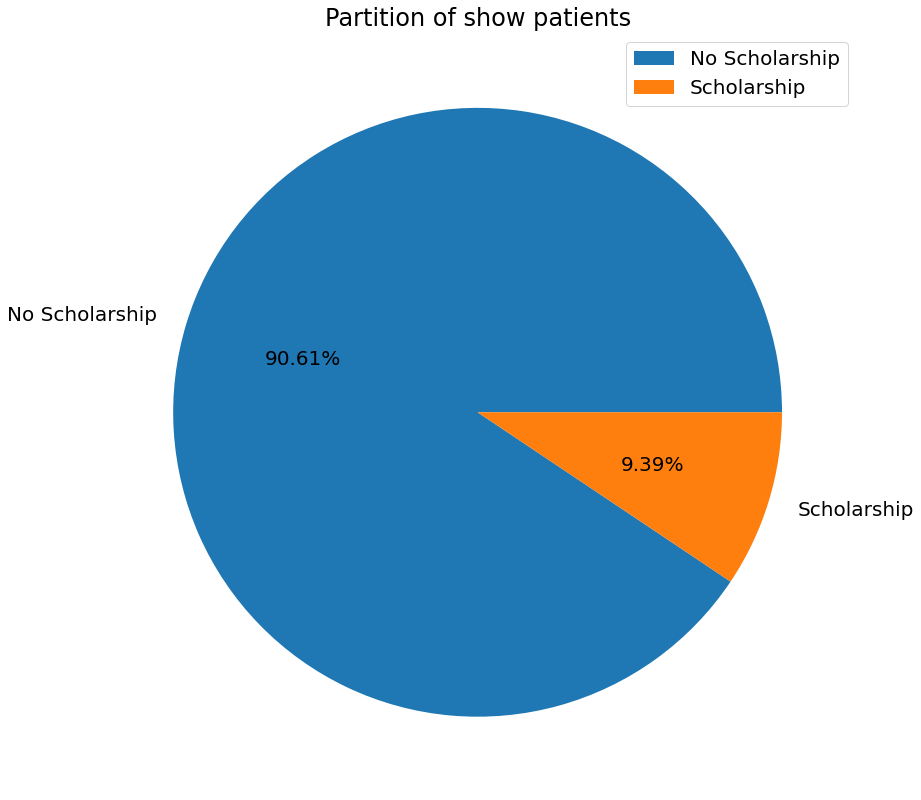

In [146]:
plt.figure(figsize=[16,14])
plt.pie(df_show['Scholarship'].value_counts(),labels=['No Scholarship','Scholarship'],autopct='%1.2f%%')
plt.rc('font', size=20)
plt.title('Partition of show patients')
plt.legend();

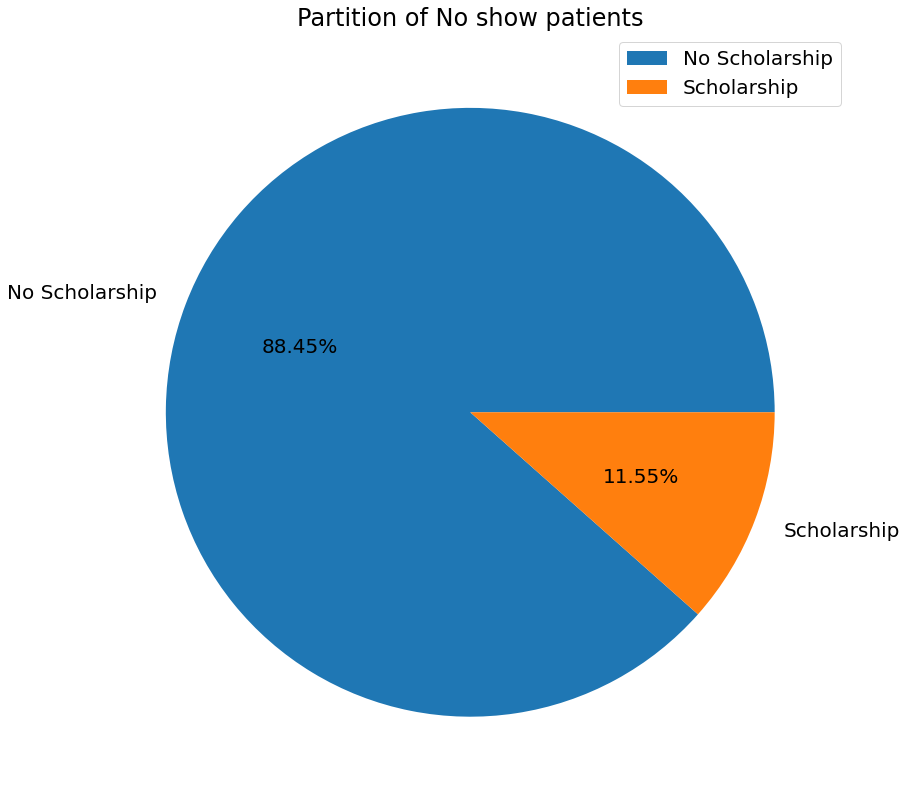

In [147]:
plt.figure(figsize=[16,14])
plt.pie(df_noshow['Scholarship'].value_counts(),labels=['No Scholarship','Scholarship'],autopct='%1.2f%%')
plt.rc('font', size=20)
plt.title('Partition of No show patients')
plt.legend();

impact of Scholarship state is insignificant

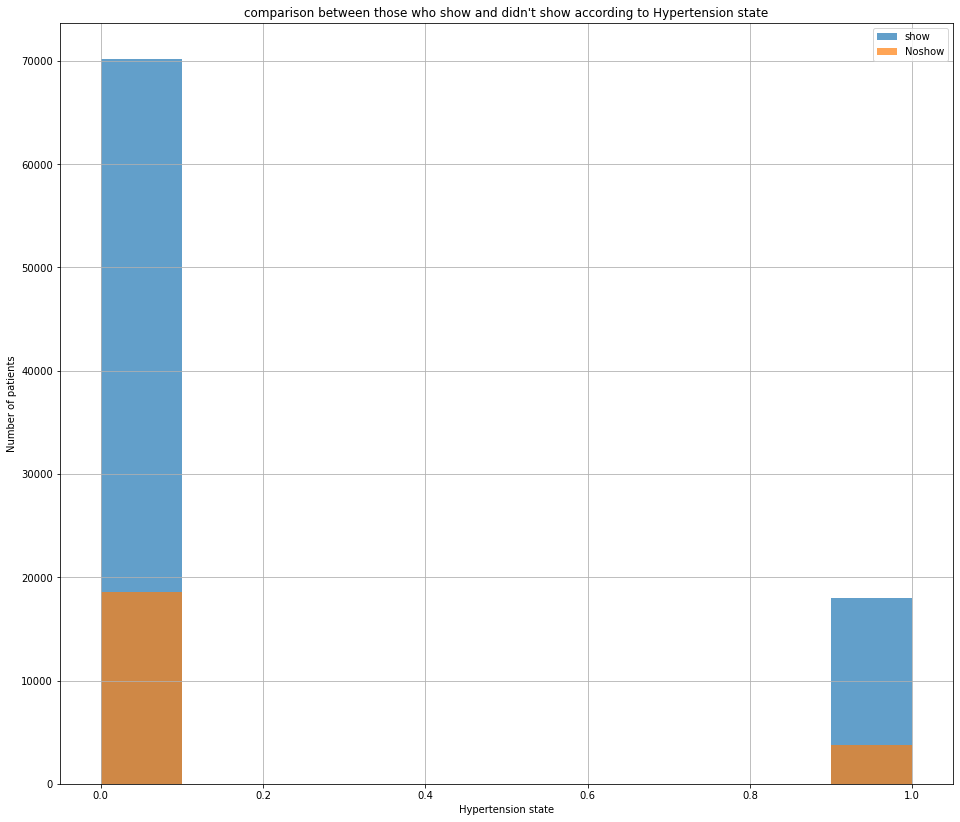

In [56]:
# compare between those who show and didn't show according to hypertension state.

plt.figure(figsize=[16,14])
df_show['Hypertension'].hist(alpha=.7, label= 'show')
df_noshow['Hypertension'].hist(alpha=.7, label= 'Noshow')
plt.title("comparison between those who show and didn't show according to Hypertension state")
plt.xlabel('Hypertension state')
plt.ylabel('Number of patients')
plt.legend();

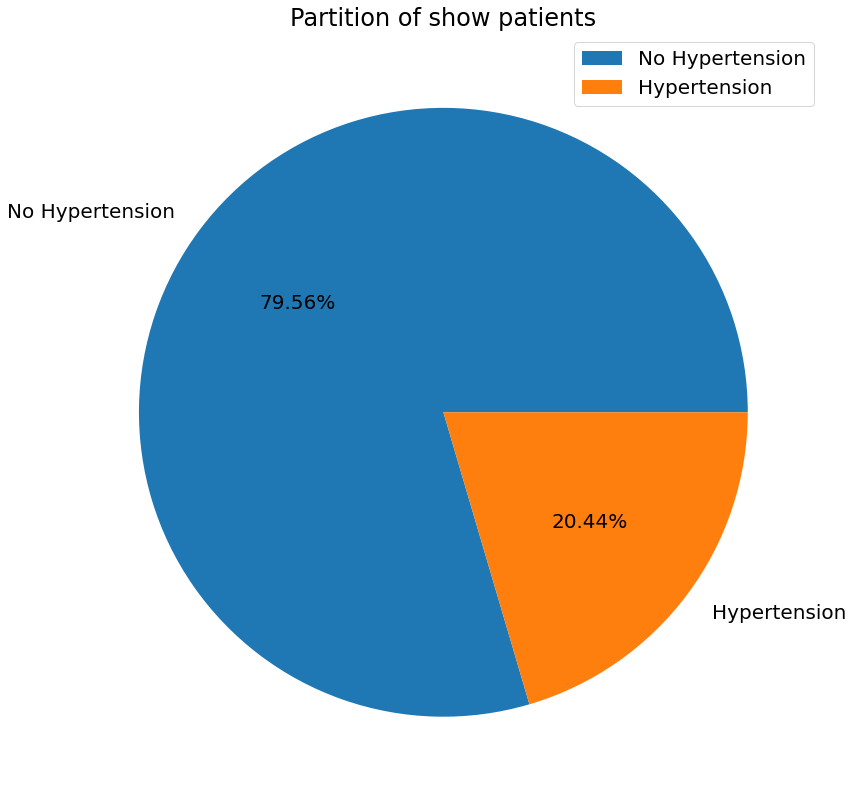

In [148]:
plt.figure(figsize=[16,14])
plt.pie(df_show['Hypertension'].value_counts(),labels=['No Hypertension','Hypertension'],autopct='%1.2f%%')
plt.rc('font', size=20)
plt.title('Partition of show patients')
plt.legend();

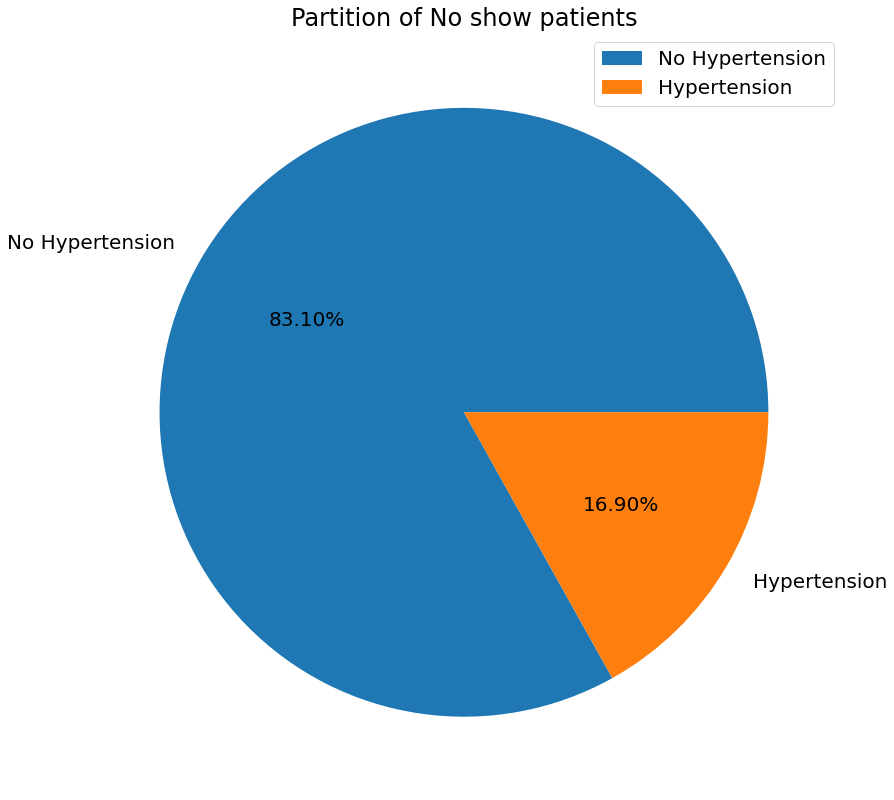

In [150]:
plt.figure(figsize=[16,14])
plt.pie(df_noshow['Hypertension'].value_counts(),labels=['No Hypertension','Hypertension'],autopct='%1.2f%%')
plt.rc('font', size=20)
plt.title('Partition of No show patients')
plt.legend();

impact of Hypertension state is insignificant

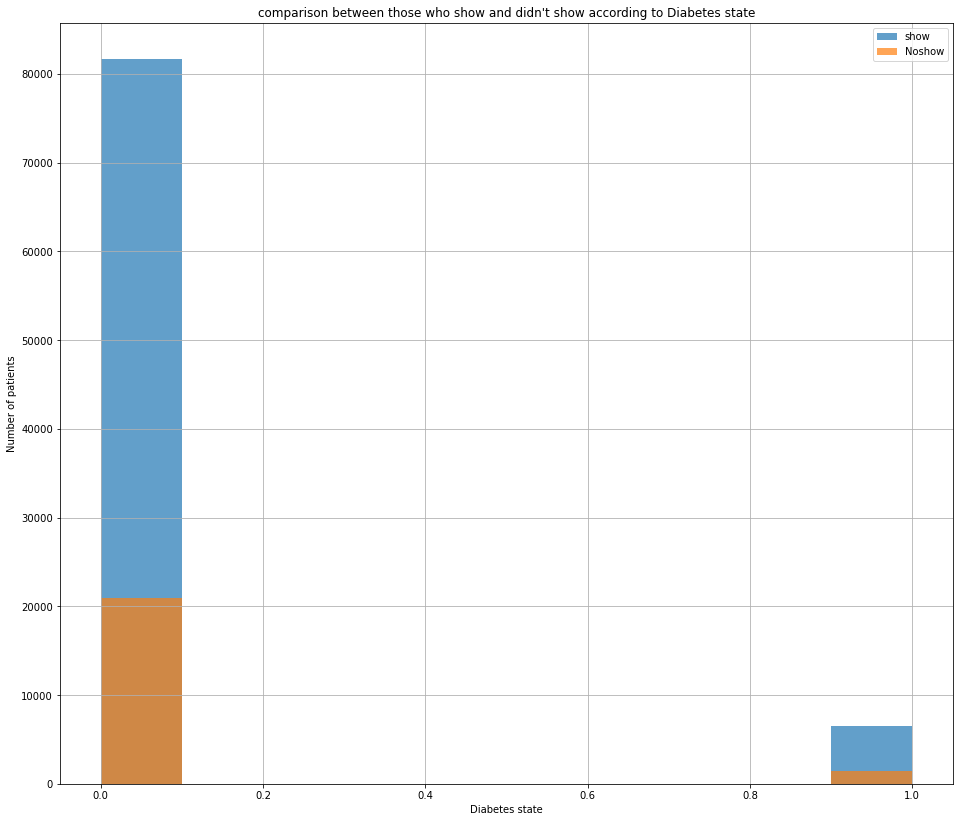

In [59]:
# compare between those who show and didn't show according to Diabetes state.

plt.figure(figsize=[16,14])
df_show['Diabetes'].hist(alpha=.7, label= 'show')
df_noshow['Diabetes'].hist(alpha=.7, label= 'Noshow')
plt.title("comparison between those who show and didn't show according to Diabetes state")
plt.xlabel('Diabetes state')
plt.ylabel('Number of patients')
plt.legend();

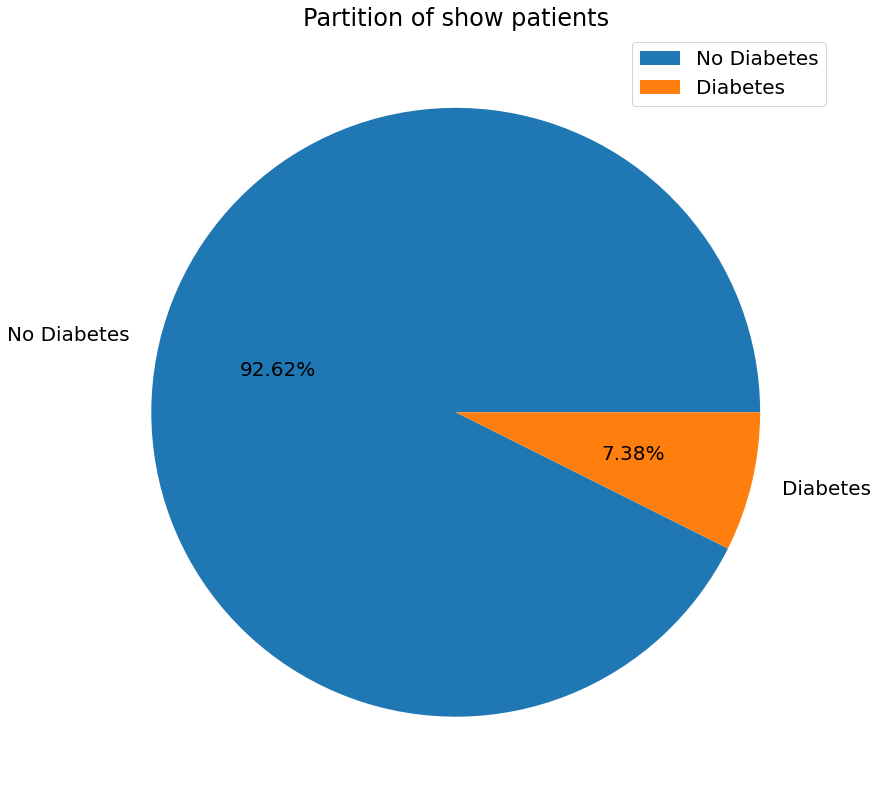

In [151]:
plt.figure(figsize=[16,14])
plt.pie(df_show['Diabetes'].value_counts(),labels=['No Diabetes','Diabetes'],autopct='%1.2f%%')
plt.rc('font', size=20)
plt.title('Partition of show patients')
plt.legend();

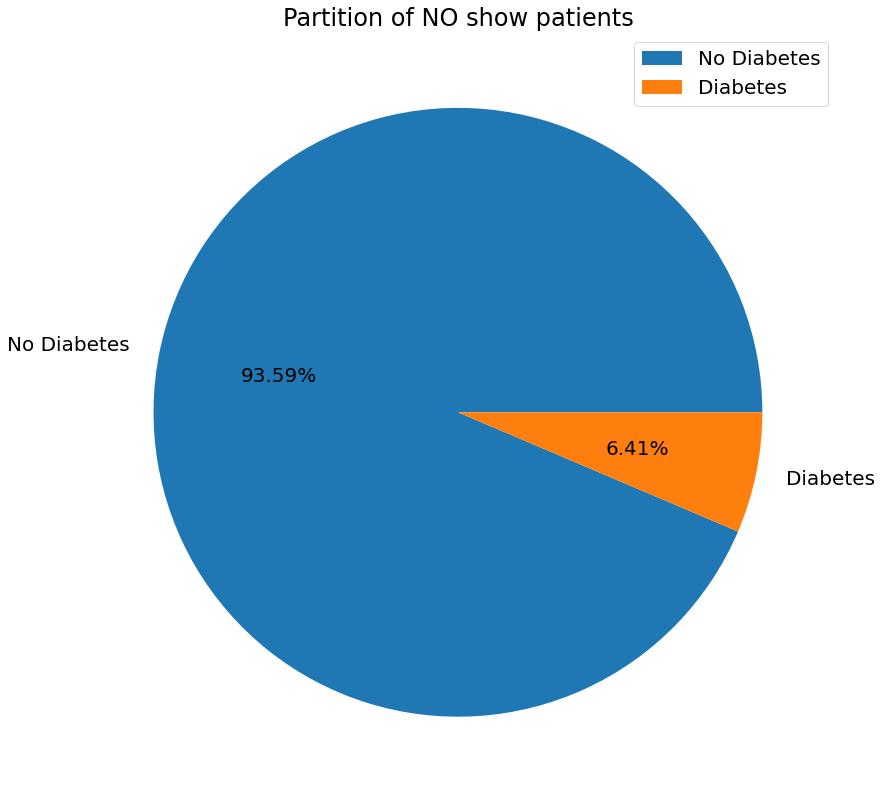

In [153]:
plt.figure(figsize=[16,14])
plt.pie(df_noshow['Diabetes'].value_counts(),labels=['No Diabetes','Diabetes'],autopct='%1.2f%%')
plt.rc('font', size=20)
plt.title('Partition of NO show patients')
plt.legend();

impact of Diabetes state is insignificant

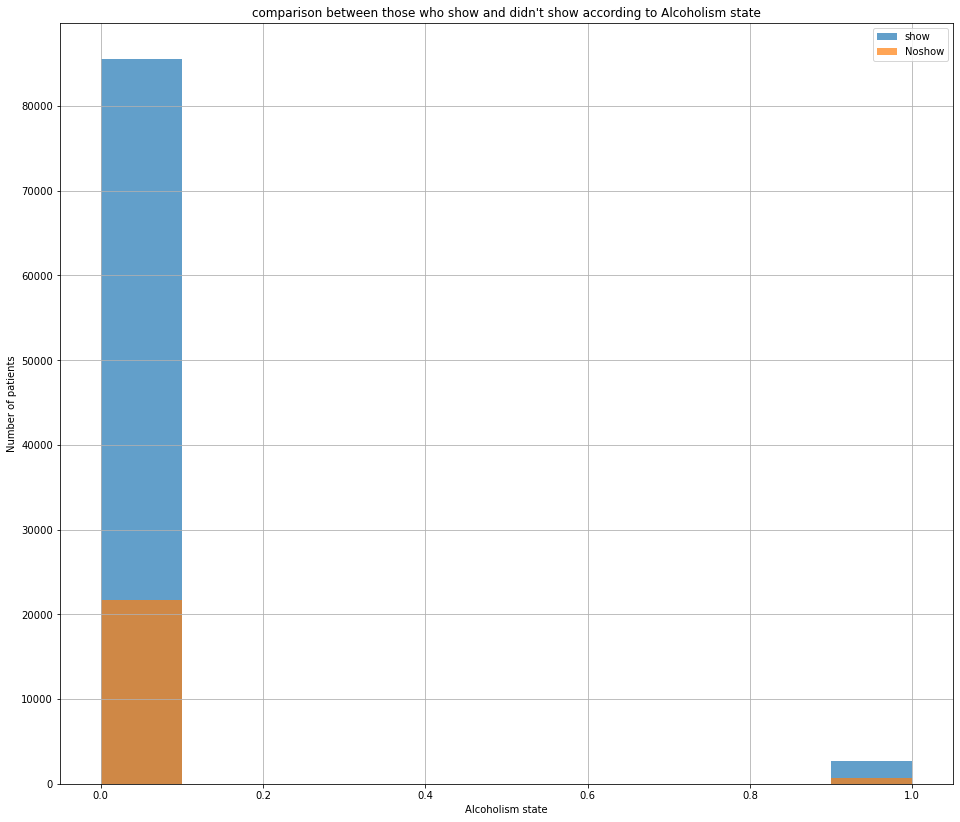

In [62]:
# compare between those who show and didn't show according to Alcoholism state.

plt.figure(figsize=[16,14])
df_show['Alcoholism'].hist(alpha=.7, label= 'show')
df_noshow['Alcoholism'].hist(alpha=.7, label= 'Noshow')
plt.title("comparison between those who show and didn't show according to Alcoholism state")
plt.xlabel('Alcoholism state')
plt.ylabel('Number of patients')
plt.legend();

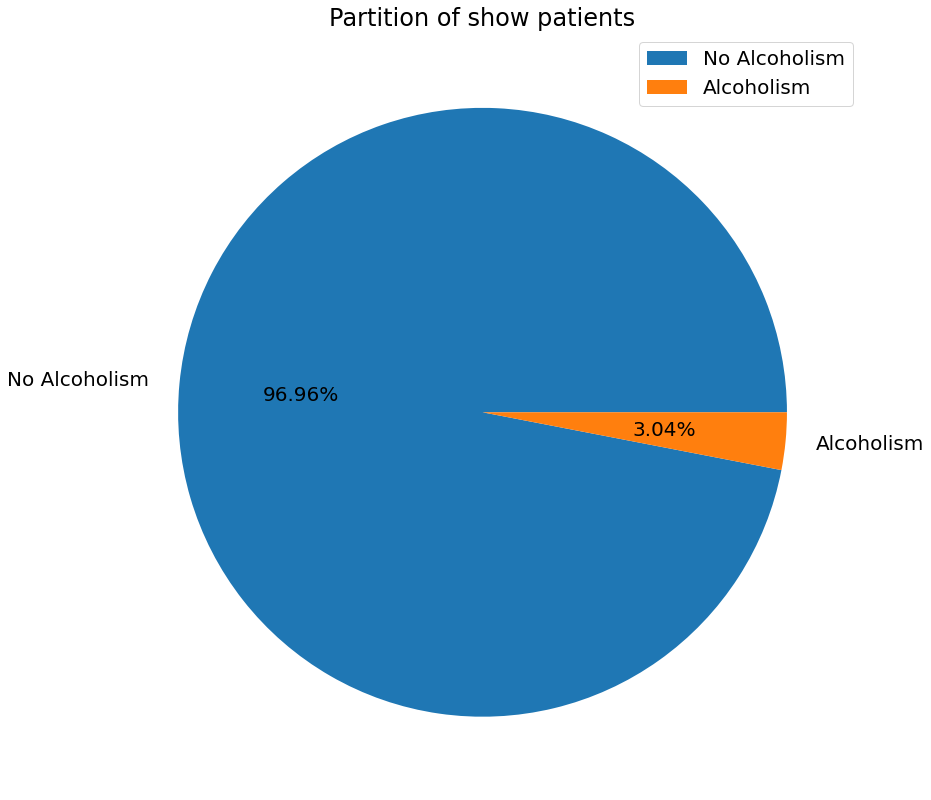

In [154]:
plt.figure(figsize=[16,14])
plt.pie(df_show['Alcoholism'].value_counts(),labels=['No Alcoholism','Alcoholism'],autopct='%1.2f%%')
plt.rc('font', size=20)
plt.title('Partition of show patients')
plt.legend();

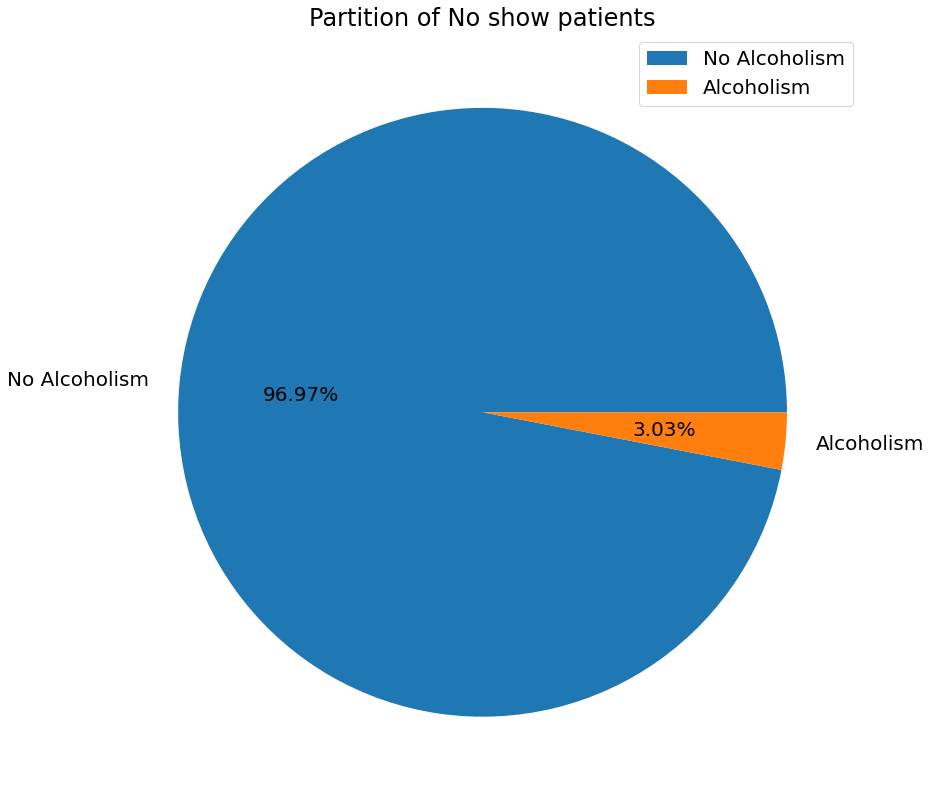

In [137]:
plt.figure(figsize=[16,14])
plt.pie(df_noshow['Alcoholism'].value_counts(),labels=['No Alcoholism','Alcoholism'],autopct='%1.2f%%')
plt.rc('font', size=20)
plt.title('Partition of No show patients')
plt.legend();

impact of Alcoholism state is insignificant

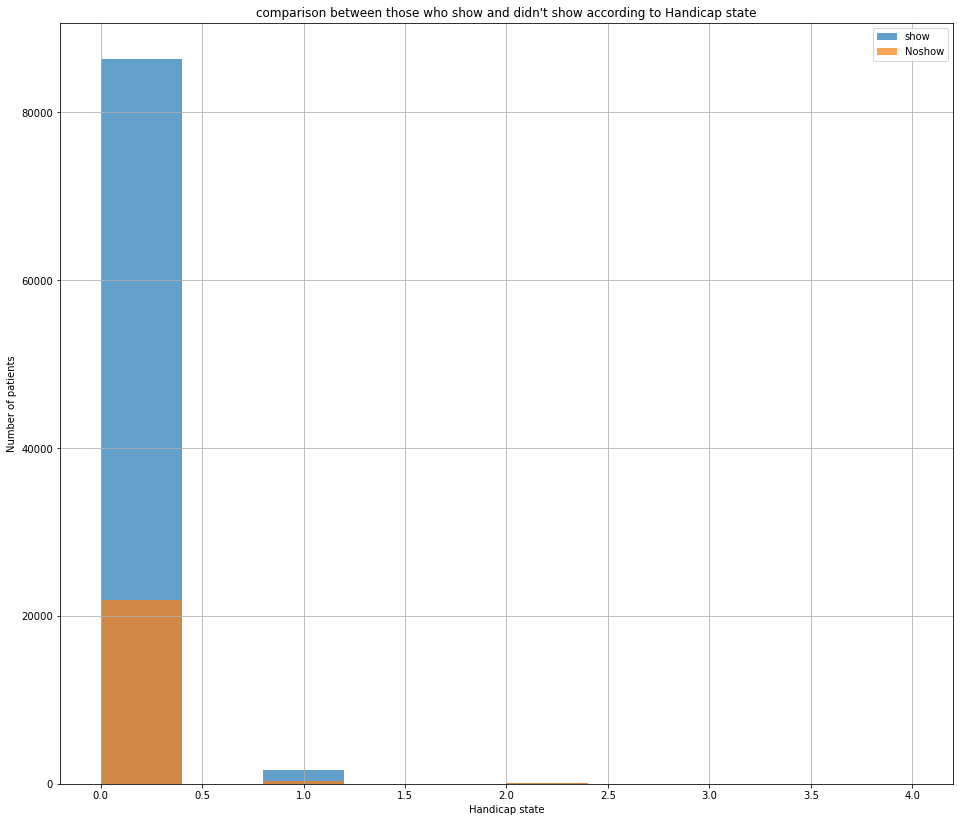

In [65]:
# compare between those who show and didn't show according to Handicap state.

plt.figure(figsize=[16,14])
df_show['Handicap'].hist(alpha=.7, label= 'show')
df_noshow['Handicap'].hist(alpha=.7, label= 'Noshow')
plt.title("comparison between those who show and didn't show according to Handicap state")
plt.xlabel('Handicap state')
plt.ylabel('Number of patients')
plt.legend();

In [139]:
df_show['Handicap'].value_counts()

0    86374
1     1676
2      146
3       10
4        2
Name: Handicap, dtype: int64

In [67]:
df_noshow['Handicap'].value_counts()

0    21912
1      366
2       37
3        3
4        1
Name: Handicap, dtype: int64

impact of Handicap state is insignificant

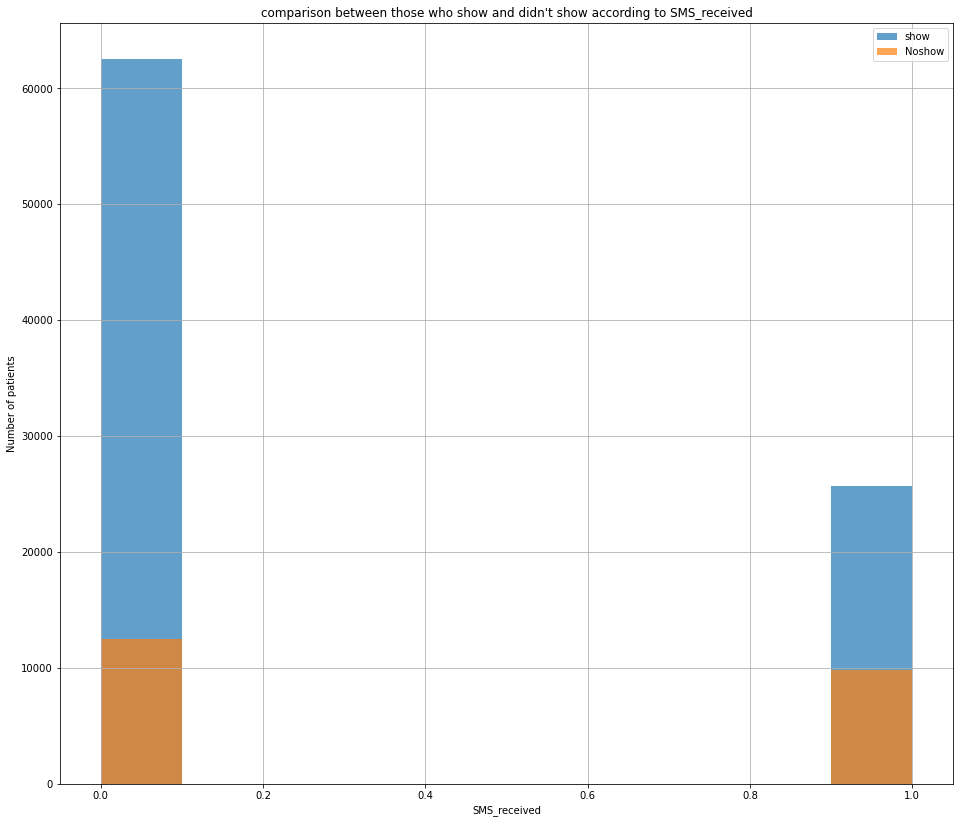

In [75]:
# compare between those who show and didn't show according to SMS_received.

plt.figure(figsize=[16,14])
df_show['SMS_received'].hist(alpha=.7, label= 'show')
df_noshow['SMS_received'].hist(alpha=.7, label= 'Noshow')
plt.title("comparison between those who show and didn't show according to SMS_received")
plt.xlabel('SMS_received')
plt.ylabel('Number of patients')
plt.legend();

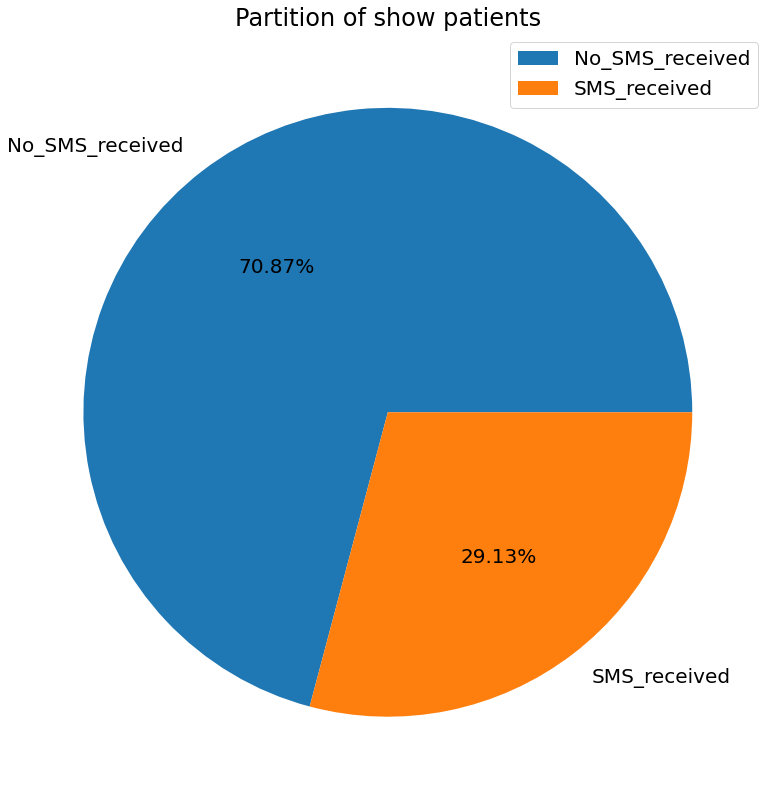

In [155]:
plt.figure(figsize=[16,14])
plt.pie(df_show['SMS_received'].value_counts(),labels=['No_SMS_received','SMS_received'],autopct='%1.2f%%')
plt.rc('font', size=20)
plt.title('Partition of show patients')
plt.legend();

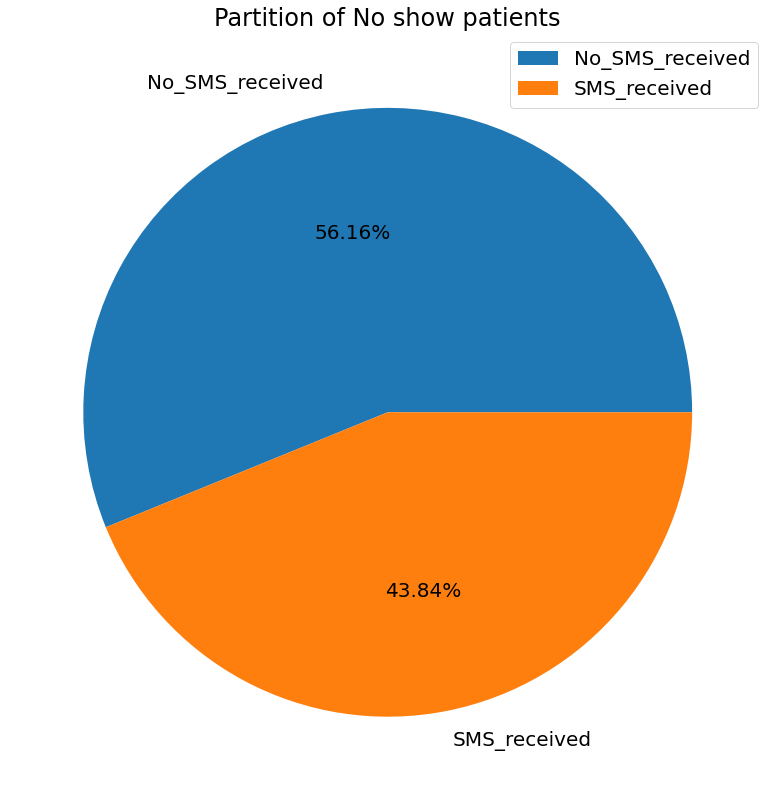

In [156]:
plt.figure(figsize=[16,14])
plt.pie(df_noshow['SMS_received'].value_counts(),labels=['No_SMS_received','SMS_received'],autopct='%1.2f%%')
plt.rc('font', size=20)
plt.title('Partition of No show patients')
plt.legend();

it is weird to see that patients who didn't received SMS show more than who received SMS

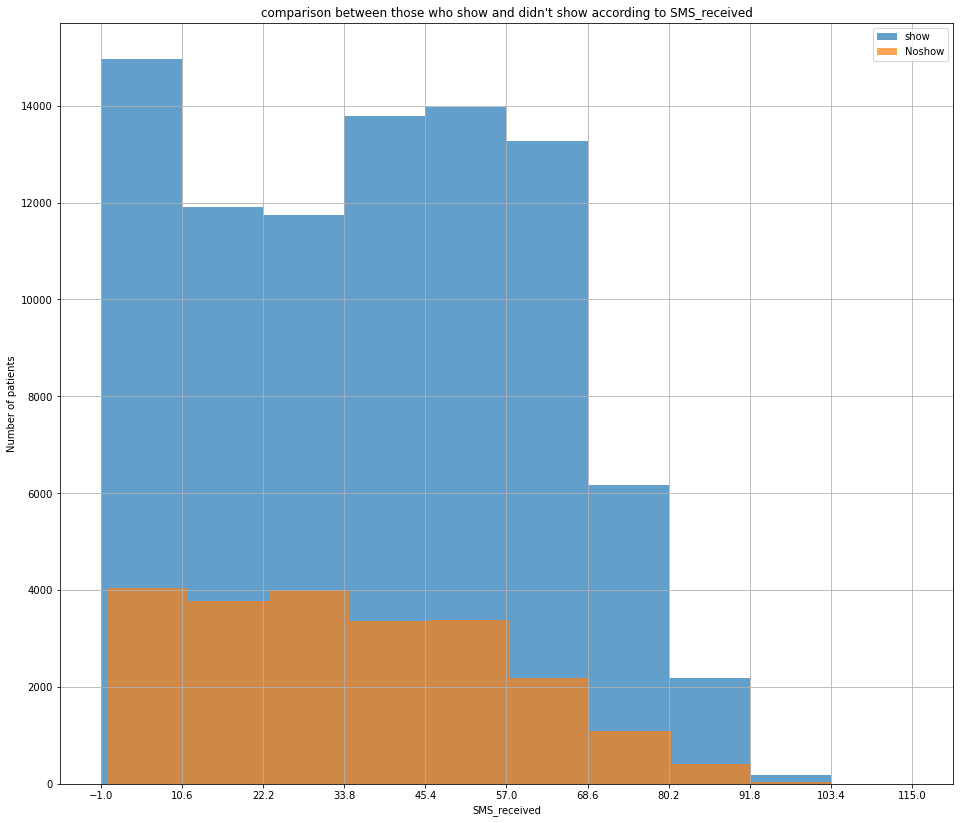

In [114]:
# compare between those who show and didn't show according to their age.

plt.figure(figsize=[16,14])
n, bins, patches = plt.hist(df_show.Age,alpha=.7,label='show')
plt.xticks(bins)
df_noshow['Age'].hist(alpha=.7, label= 'Noshow')
plt.title("comparison between those who show and didn't show according to SMS_received")
plt.xlabel('SMS_received')
plt.ylabel('Number of patients')
plt.legend();

> - the most patients show who have 0 to 10 years follwed by who have 34 to 69 years
> - the older they get the less likely they show on the appointment


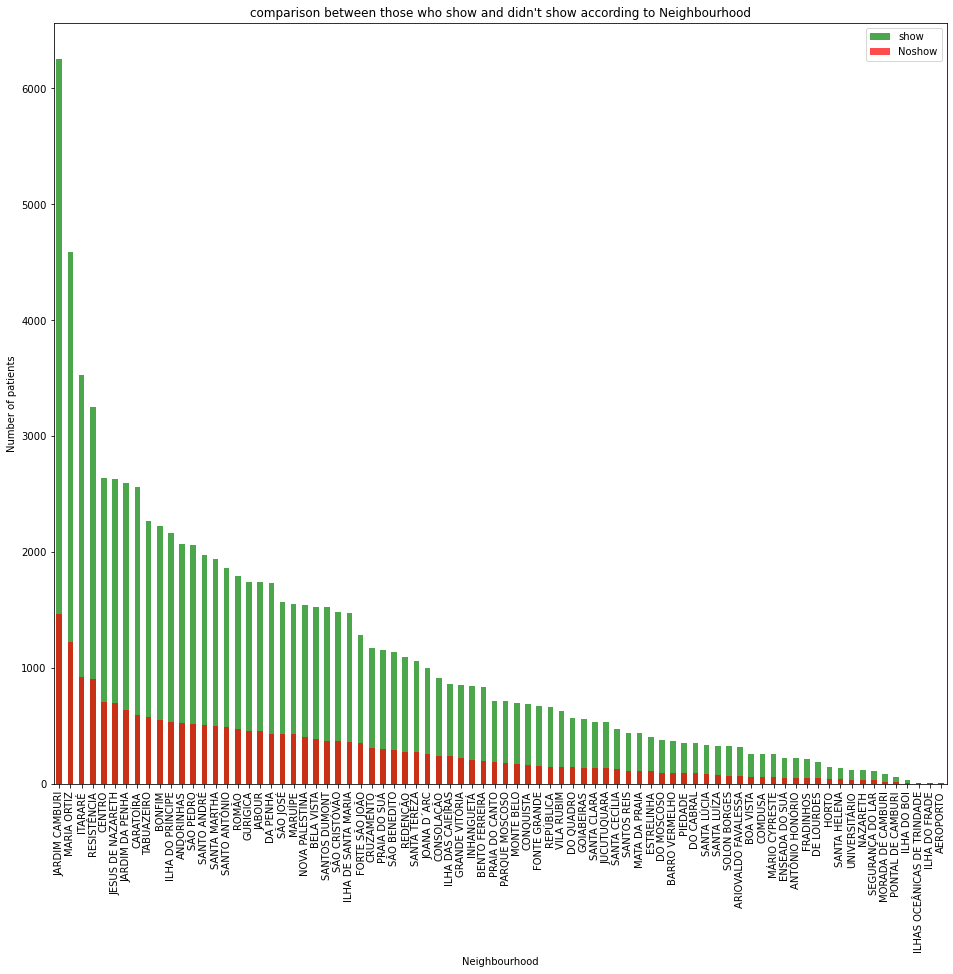

In [120]:
# compare between those who show and didn't show according to Neighbourhood.

plt.figure(figsize=[16,14])
df_show['Neighbourhood'].value_counts().plot(kind='bar',alpha=0.7,color='green',label='show')
df_noshow['Neighbourhood'].value_counts().plot(kind='bar',alpha=0.7,color='red',label='Noshow')
plt.title("comparison between those who show and didn't show according to Neighbourhood")
plt.xlabel('Neighbourhood')
plt.ylabel('Number of patients')
plt.legend();

seems that Neighbourhood have a strong impact on patients to show or not.

<a id='conclusions'></a>
## Conclusions
> - Neighbourhood is strongly related to patients who show
> - Age is also related as patients from 0 to 10 years show the most at the appointment follwed by 34 to 69 years
> - it was weird to see that more patients showed without receiving a SMS

**limitations**: there wasn't too many characteristics that have a relation with patients number who show at the appointment

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [121]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1